### Loading Libraries


In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer,SimpleImputer
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.combine import SMOTETomek
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns 

### Loading Dataset as DataFrame

In [2]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

### Dataset Description

In [3]:
df.shape

(5110, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [6]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


### Checking for null values

<Axes: >

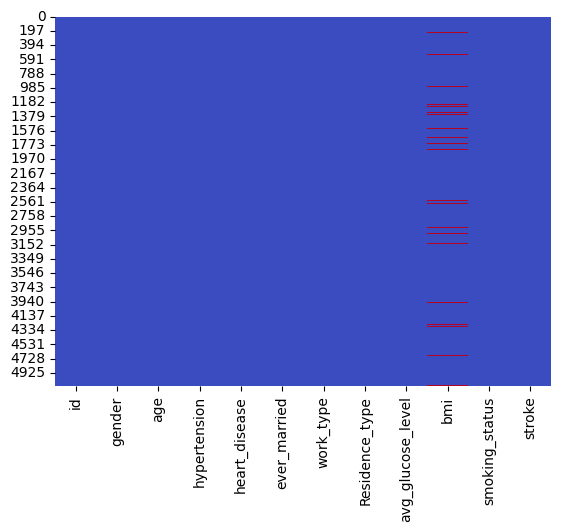

In [7]:
sns.heatmap(df.isnull(), cmap="coolwarm", cbar=False)

In [8]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

### Handling null values in BMI

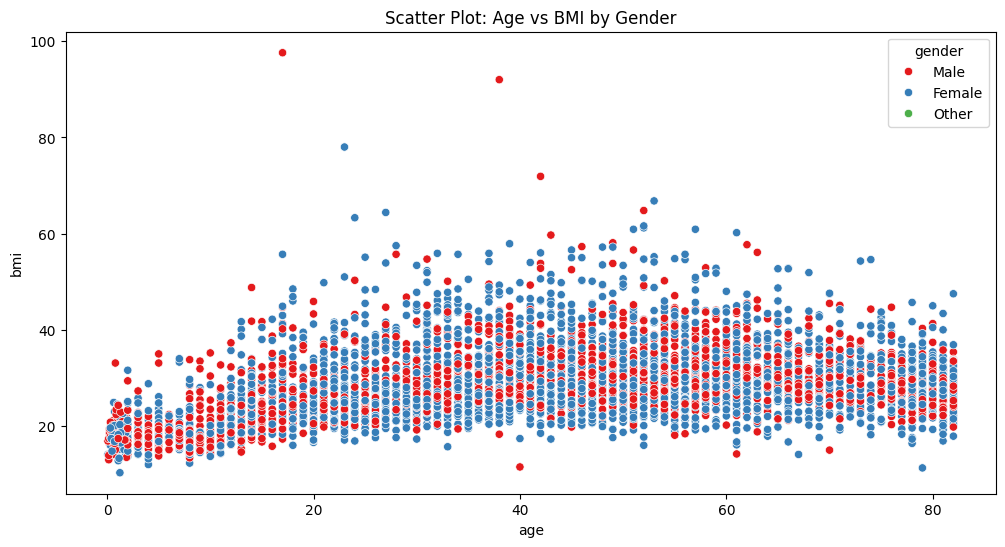

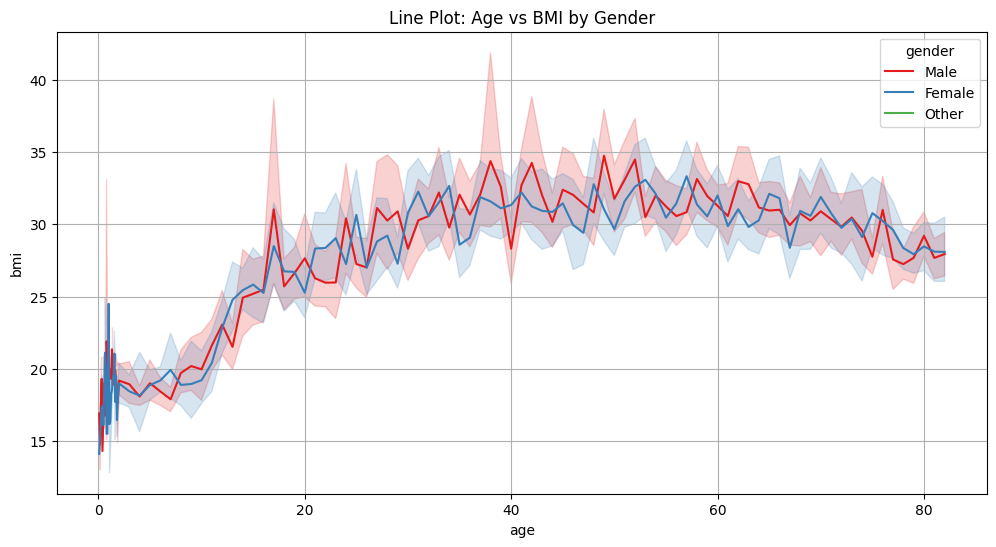

In [9]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x="age", y="bmi", hue="gender", palette="Set1")
plt.title("Scatter Plot: Age vs BMI by Gender")
plt.show()
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x="age", y="bmi", hue="gender", palette="Set1")
plt.title("Line Plot: Age vs BMI by Gender")
plt.grid(True)
plt.show()

In [10]:
median_bmi_by_group = df.groupby(["age"])["bmi"].median()

In [11]:
median_bmi_by_group.isnull().sum()

0

In [12]:
df["age"][df.isnull().any(axis=1)].unique()

array([61.  , 59.  , 78.  , 57.  , 58.  , 63.  , 75.  , 76.  , 51.  ,
       66.  , 72.  , 38.  , 65.  , 79.  , 71.  ,  1.32, 64.  , 80.  ,
       77.  , 74.  , 34.  , 54.  , 40.  , 48.  , 31.  , 43.  ,  9.  ,
       52.  , 17.  , 35.  , 23.  , 13.  , 73.  ,  3.  ,  6.  , 46.  ,
       49.  , 25.  , 27.  ,  7.  , 30.  , 47.  , 29.  , 45.  , 69.  ,
       32.  , 60.  , 10.  , 20.  , 67.  , 42.  ,  0.48, 50.  , 19.  ,
       62.  ,  5.  , 14.  , 68.  , 33.  , 56.  , 70.  , 44.  , 39.  ,
       53.  , 41.  ,  1.88, 16.  ,  1.08,  1.8 , 37.  ,  8.  , 82.  ,
       18.  ])

In [13]:
df[df.isnull().any(axis=1)]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
13,8213,Male,78.0,0,1,Yes,Private,Urban,219.84,NaN,Unknown,1
19,25226,Male,57.0,0,1,No,Govt_job,Urban,217.08,NaN,Unknown,1
27,61843,Male,58.0,0,0,Yes,Private,Rural,189.84,NaN,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5039,42007,Male,41.0,0,0,No,Private,Rural,70.15,NaN,formerly smoked,0
5048,28788,Male,40.0,0,0,Yes,Private,Urban,191.15,NaN,smokes,0
5093,32235,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,NaN,smokes,0
5099,7293,Male,40.0,0,0,Yes,Private,Rural,83.94,NaN,smokes,0


In [14]:
def fill_bmi(row):
    if pd.isnull(row["bmi"]):
        return median_bmi_by_group[row["age"]]
    else:
        return row["bmi"]

In [15]:
df["bmi"] = df.apply(fill_bmi, axis=1)

In [16]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

### Finding Catagorical Features


In [17]:
cat_features = [feature for feature in df.columns if df[feature].dtypes == 'object']
print(cat_features)

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']


### Finding Numerical Features

In [18]:
num_features = [feature for feature in df.columns if df[feature].dtypes != 'object']
print(num_features)

['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']


### Encoding:

Using Label Encoding: gender, ever_married, Residence_type (all binary). 

Using One-Hot Encoding: work_type, smoking_status (multiclass categorical).

In [19]:
binary_columns = ["gender", "ever_married", "Residence_type"]
multiclass_columns = ["work_type", "smoking_status"]

In [20]:
label_encoder = LabelEncoder()
one_hot_encoder = OneHotEncoder(drop="first", dtype=int, sparse_output=False)


In [21]:
for col in binary_columns:
    df[col] = label_encoder.fit_transform(df[col])

In [22]:
multiclass_encoded = one_hot_encoder.fit_transform(df[multiclass_columns])
multiclass_encoded_df = pd.DataFrame(
    multiclass_encoded,
    columns=one_hot_encoder.get_feature_names_out(multiclass_columns),
)

In [23]:
df = df.drop(columns=multiclass_columns)
df = pd.concat([df, multiclass_encoded_df], axis=1)

In [24]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,1,67.0,0,1,1,1,228.69,36.60,1,0,1,0,0,1,0,0
1,51676,0,61.0,0,0,1,0,202.21,29.45,1,0,0,1,0,0,1,0
2,31112,1,80.0,0,1,1,0,105.92,32.50,1,0,1,0,0,0,1,0
3,60182,0,49.0,0,0,1,1,171.23,34.40,1,0,1,0,0,0,0,1
4,1665,0,79.0,1,0,1,0,174.12,24.00,1,0,0,1,0,0,1,0


### Plotting Correaltion

[Text(0.5, 1.0, 'Correlation Matrix')]

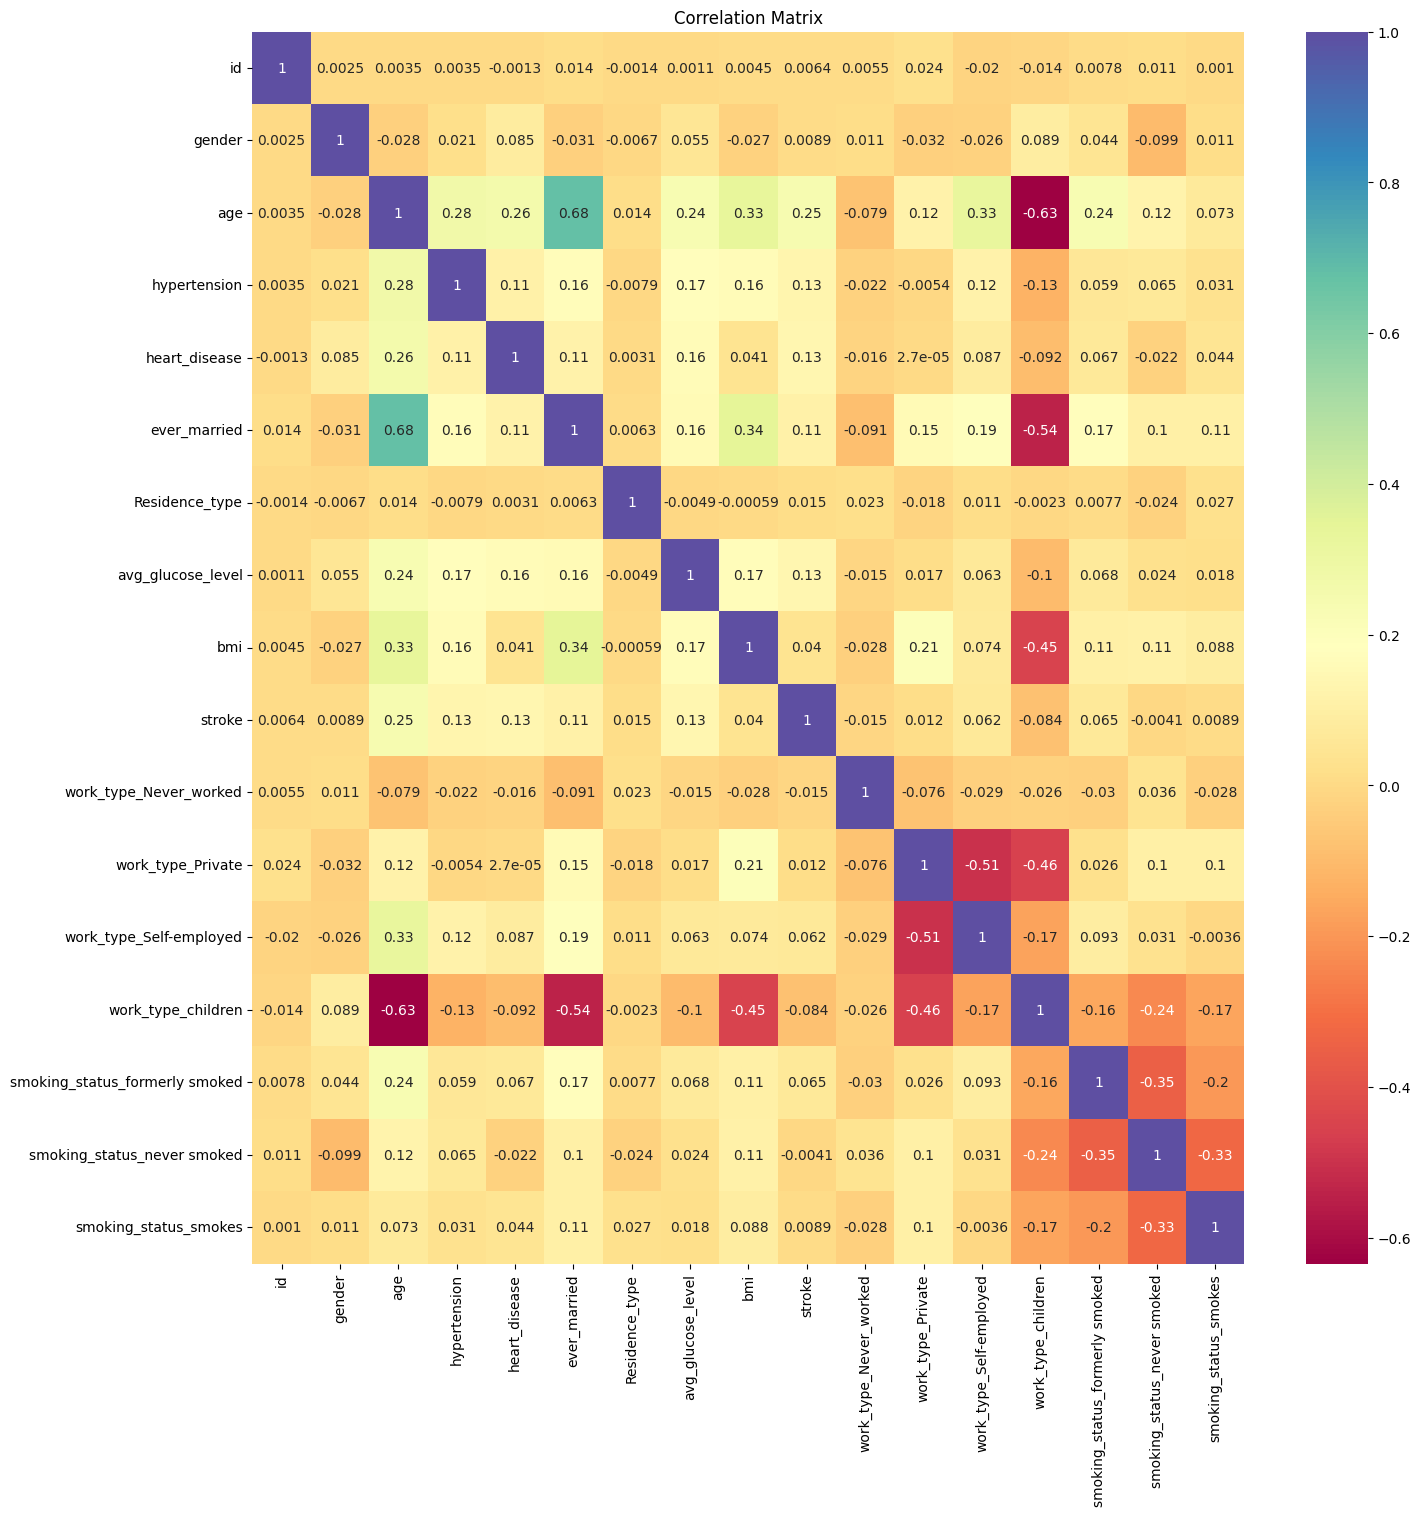

In [25]:
#As a numerical Column the Id has no significance which we can see from the Correlation Matrix
corr = df.corr() 
plt.figure(figsize=(16,16))
sns.heatmap(data=corr, annot=True, cmap='Spectral').set(title="Correlation Matrix")

### Dropping Patient ID from Dataframe


In [26]:
df = df.drop('id',axis='columns')

### Hisplotting BMI, Age and Avg Sugar Level

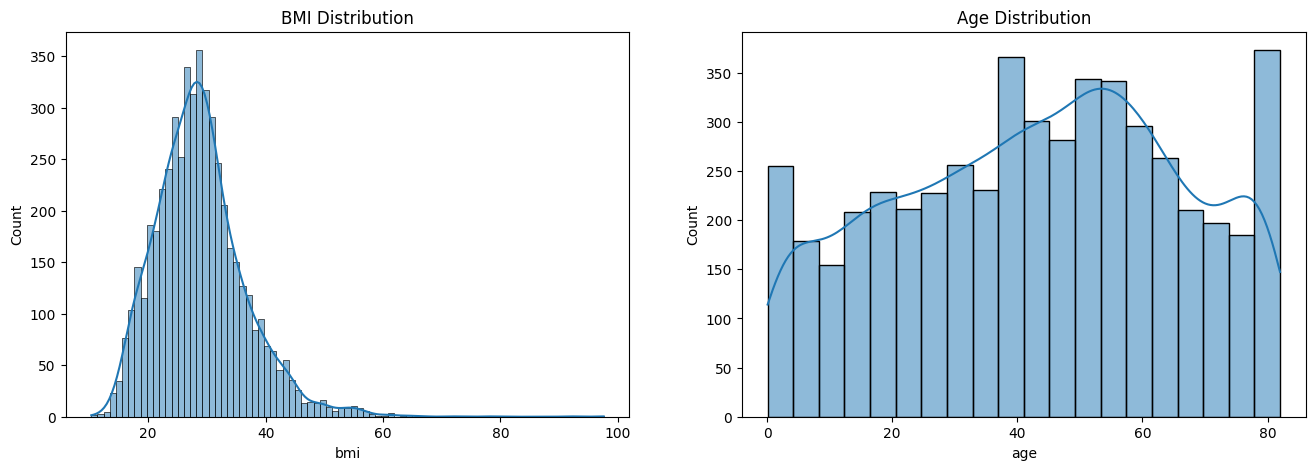

In [27]:
plt.figure(figsize=(16,5))


plt.subplot(1,2,1)
sns.histplot(df['bmi'], kde=True)
plt.title('BMI Distribution')


plt.subplot(1,2,2)
sns.histplot(df['age'], kde=True)
plt.title('Age Distribution')


plt.show()

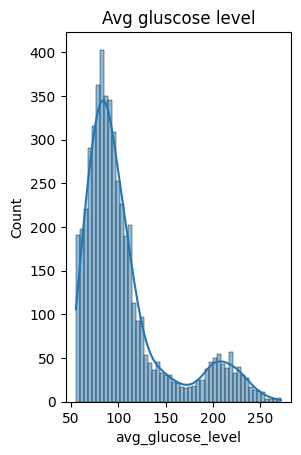

In [28]:
plt.subplot(1,2,1)
sns.histplot(df['avg_glucose_level'], kde=True)
plt.title('Avg gluscose level')

plt.show()

In [29]:
new_df = df.copy()

### Capping Outliers in BMI

<Axes: ylabel='bmi'>

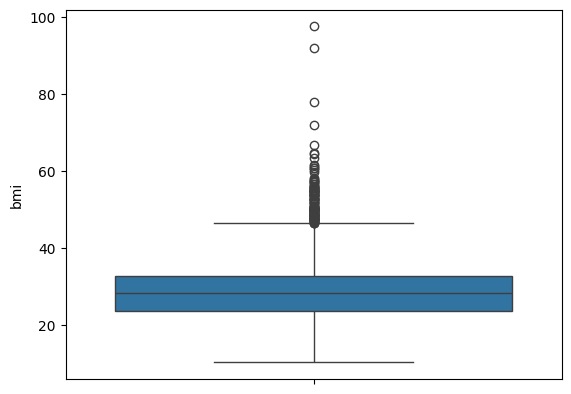

In [30]:
sns.boxplot(df['bmi'])

In [31]:
percentile25=df['bmi'].quantile(0.25)
percentile75=df['bmi'].quantile(0.75)


In [32]:
iqr = percentile75 - percentile25

In [33]:
upper_limit = percentile75+1.5*iqr
lower_limit  = percentile25-1.5*iqr

In [34]:
print(upper_limit)
print(lower_limit)

46.449999999999996
10.050000000000002


In [35]:
new_df['bmi'] = np.where(
    new_df['bmi']>upper_limit,
    upper_limit,
    np.where(
        new_df['bmi']<lower_limit,
        lower_limit,
        new_df['bmi']
    )
)

<Axes: ylabel='bmi'>

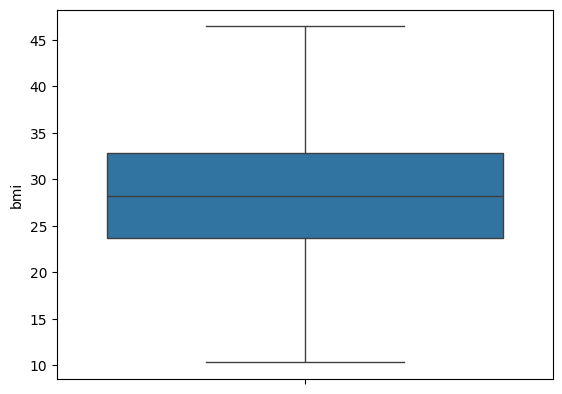

In [36]:
sns.boxplot(new_df['bmi'])

Text(0.5, 1.0, 'BMI Distribution')

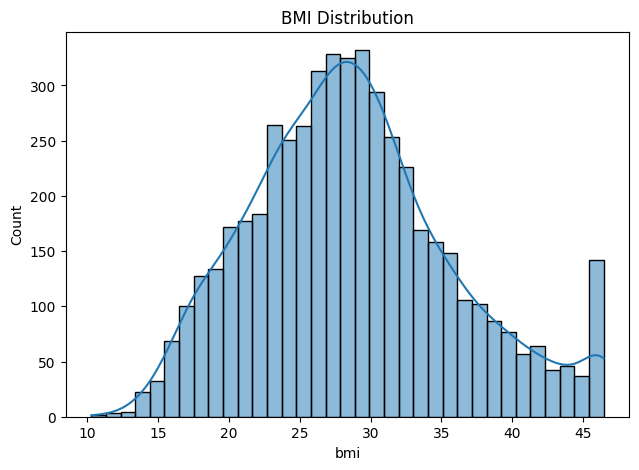

In [37]:
plt.figure(figsize=(16,5))


plt.subplot(1,2,1)
sns.histplot(new_df['bmi'], kde=True)
plt.title('BMI Distribution')

### Capping Outliers in avg_glucose_level

<Axes: ylabel='avg_glucose_level'>

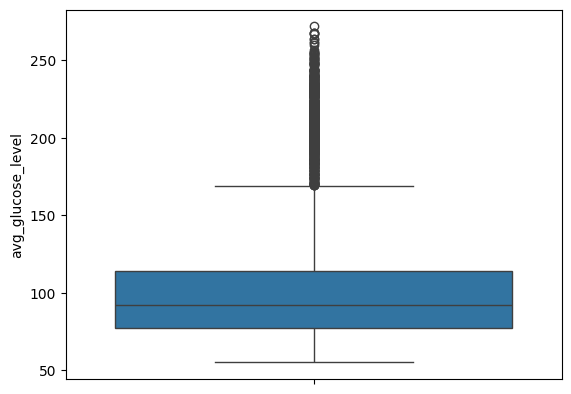

In [38]:
sns.boxplot(new_df['avg_glucose_level'])

In [39]:
percentile25=df['avg_glucose_level'].quantile(0.25)
percentile75=df['avg_glucose_level'].quantile(0.75)

In [40]:
iqr = percentile75 - percentile25

In [41]:
upper_limit = percentile75+1.5*iqr
lower_limit  = percentile25-1.5*iqr

In [42]:
print(upper_limit)
print(lower_limit)

169.35750000000002
21.977500000000006


In [43]:
new_df['avg_glucose_level'] = np.where(
    new_df['avg_glucose_level']>upper_limit,
    upper_limit,
    np.where(
        new_df['avg_glucose_level']<lower_limit,
        lower_limit,
        new_df['avg_glucose_level']
    )
)

<Axes: ylabel='avg_glucose_level'>

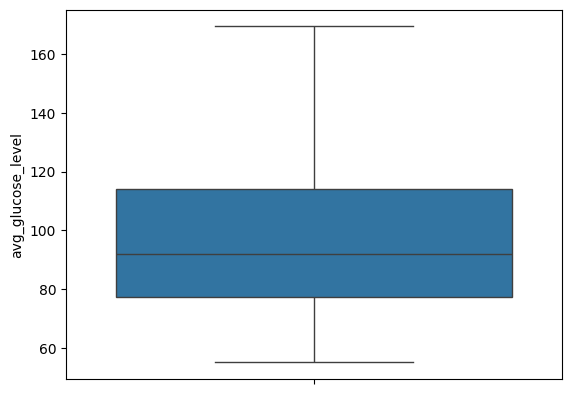

In [44]:
sns.boxplot(new_df['avg_glucose_level'])

Text(0.5, 1.0, 'Avg Glucose Level Distribution')

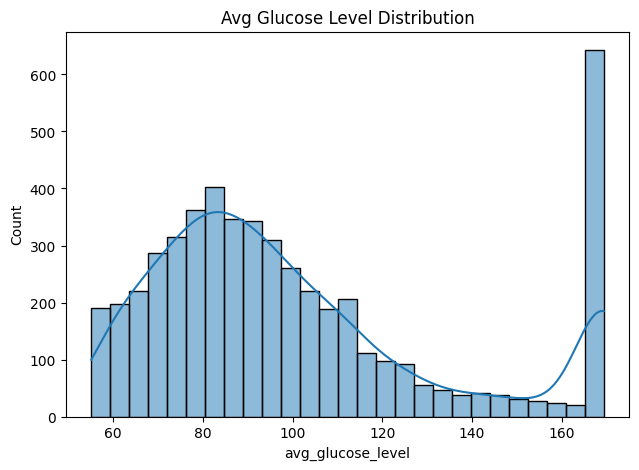

In [45]:
plt.figure(figsize=(16,5))


plt.subplot(1,2,1)
sns.histplot(new_df['avg_glucose_level'], kde=True)
plt.title('Avg Glucose Level Distribution')

### Over Sampling Dataset Using SMOTE

In [46]:
new_df.sample(10)

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
409,0,80.00,0,0,1,0,70.3100,23.2,0,0,1,0,0,0,0,0
156,0,50.00,0,0,1,0,102.1600,31.4,1,0,1,0,0,0,0,1
564,0,0.32,0,0,0,0,73.7100,16.2,0,0,0,0,1,0,0,0
755,0,64.00,0,0,1,0,169.3575,27.4,0,0,1,0,0,0,0,0
976,1,59.00,0,0,1,0,88.8100,38.0,0,0,0,0,0,1,0,0
619,1,43.00,0,0,1,1,111.4300,21.9,0,0,1,0,0,0,0,1
2611,0,25.00,0,0,1,1,84.2500,24.5,0,0,1,0,0,0,0,0
3103,1,66.00,0,0,1,0,88.8300,29.1,0,0,1,0,0,0,0,0
767,1,82.00,0,0,1,1,105.7700,29.5,0,0,1,0,0,0,0,0
335,1,11.00,0,0,0,0,90.6900,18.6,0,0,0,0,1,0,0,0


Text(0.5, 1.0, 'Number of Patient')

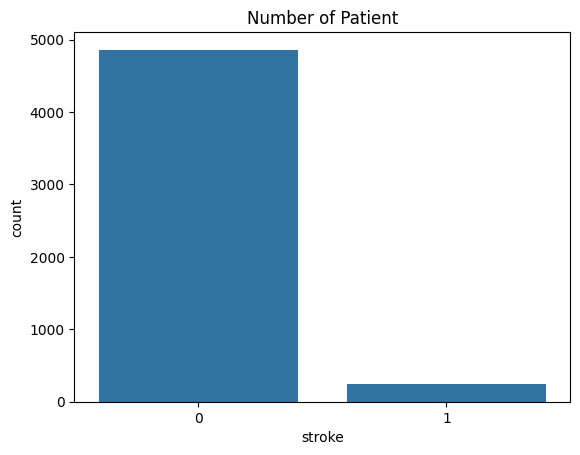

In [47]:
sns.countplot(data=new_df , x='stroke')
plt.title('Number of Patient')

In [48]:
new_df.isnull().mean()*100

gender                            0.0
age                               0.0
hypertension                      0.0
heart_disease                     0.0
ever_married                      0.0
Residence_type                    0.0
avg_glucose_level                 0.0
bmi                               0.0
stroke                            0.0
work_type_Never_worked            0.0
work_type_Private                 0.0
work_type_Self-employed           0.0
work_type_children                0.0
smoking_status_formerly smoked    0.0
smoking_status_never smoked       0.0
smoking_status_smokes             0.0
dtype: float64

In [49]:
X = new_df.drop('stroke', axis=1)
y = new_df['stroke']

In [50]:
print(y.value_counts())

stroke
0    4861
1     249
Name: count, dtype: int64


c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\imblearn\over_sampling\_smote\base.py:370: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


Text(0.5, 1.0, 'Number of Patient')

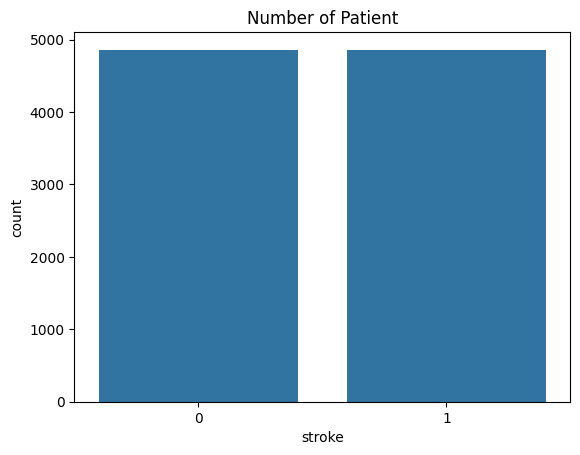

In [51]:
smt = SMOTE(k_neighbors=5, random_state=42, n_jobs=-1, sampling_strategy='auto')

X, y= smt.fit_resample(X,y)

sns.countplot(x=y)
plt.title('Number of Patient')

### Splitting Dataset

In [52]:
test_size_value = (47 % 10) + 5 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size_value/100, random_state=42)
X_train.shape, X_test.shape



((8555, 15), (1167, 15))

In [53]:
y_train.value_counts()

stroke
0    4284
1    4271
Name: count, dtype: int64

### Performing KNN

In [54]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)

In [55]:
knn_f1 = f1_score(y_test,y_pred_knn)

print("Accuracy Score", accuracy_score(y_test,y_pred_knn)*100)
print("Precision", precision_score(y_test,y_pred_knn)*100)
print("Recall", recall_score(y_test,y_pred_knn)*100)
print("F1 Score", f1_score(y_test,y_pred_knn)*100)

Accuracy Score 88.86032562125106
Precision 83.92330383480827
Recall 96.4406779661017
F1 Score 89.74763406940063


### Performing Decision Tree

In [56]:
dct = DecisionTreeClassifier(random_state=42)
dct.fit(X_train,y_train)
y_pred_dct = dct.predict(X_test)

In [57]:
dct_f1 = f1_score(y_test,y_pred_dct)

print("Accuracy Score", accuracy_score(y_test,y_pred_dct)*100)
print("Precision", precision_score(y_test,y_pred_dct)*100)
print("Recall", recall_score(y_test,y_pred_dct)*100)
print("F1 Score", f1_score(y_test,y_pred_dct)*100)

Accuracy Score 93.23050556983719
Precision 92.23140495867769
Recall 94.57627118644068
F1 Score 93.38912133891213


### Overall Result

In [58]:
if knn_f1 > dct_f1:
    print("KNN Performs better")
elif knn_f1 < dct_f1:
      print("Decision Tree Performs better")
else:
     print("Both Performs Same")

Decision Tree Performs better
